<a href="https://colab.research.google.com/github/juancaalcaraz/G15PracticaProfesionalizante-II-ISPC/blob/main/ModeloCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade keras tensorflow

In [129]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

In [155]:
# Creamos el modelo para el entrenamiento
from keras.layers import LeakyReLU
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)), #Capa de convolucion
    layers.MaxPooling2D((2, 2)),# Capa de pooling
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax') # capa de salida con softmax y salida de 4 neuronas.
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [156]:
#Modelo antes de entrenar.
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 30, 30, 128)      

In [115]:
# Cargo las imagenes guardadas en matrices de Numpy.
X_black, X_gorila = np.load('BlackDomina_images.npz'), np.load('GorilaGlue_images.npz')
X_og, X_slur = np.load('OGKush_images.npz'), np.load('Slurricane_images.npz')

In [135]:
#junto las imagenes para entrenar
image_train = np.concatenate((X_black['imagenes'], X_gorila['imagenes'], X_og['imagenes'], X_slur['imagenes']), axis=0)

In [133]:
len(image_train)

1852

array([[[166, 148, 215],
        [174, 149, 223],
        [181, 157, 231],
        ...,
        [143, 172, 226],
        [ 51,  80, 114],
        [ 53,  88, 118]],

       [[207, 189, 255],
        [168, 151, 215],
        [210, 193, 255],
        ...,
        [146, 182, 238],
        [ 81, 107, 154],
        [ 44,  80, 108]],

       [[214, 195, 254],
        [159, 142, 207],
        [186, 165, 233],
        ...,
        [152, 184, 249],
        [120, 149, 214],
        [ 66, 103, 128]],

       ...,

       [[112,  98, 152],
        [131, 116, 173],
        [118, 103, 160],
        ...,
        [121, 124, 186],
        [127, 142, 200],
        [ 66, 100, 123]],

       [[138, 125, 178],
        [123, 108, 165],
        [134, 119, 176],
        ...,
        [134, 136, 194],
        [ 93, 105, 159],
        [155, 158, 213]],

       [[125, 111, 166],
        [153, 134, 195],
        [121, 105, 159],
        ...,
        [129, 123, 178],
        [147, 143, 195],
        [134, 135, 191]]], dtype=uint8)
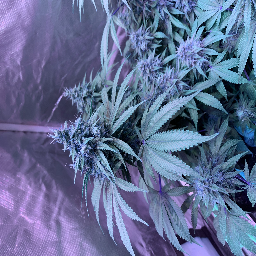

In [136]:
image_train[2]

In [137]:
import cv2
import numpy as np
def procesamiento_imagenes(imagenes: np.ndarray) -> np.ndarray:
  """
  Función para aplicarse a un conjunto de imagenes usando detección de bordes
  con los métodos Sobel y Canny.
  La misma modifica al dataset que se le pase por parámetros.
  Parámetros
  ----------
  imagenes (np.ndarray) : Array de imagenes a procesar

  returns:
  None : La función modifica directamete al Array de imagenes.
  """
  # Detectar bordes con Canny y el operador sobel.
  for i in range(len(imagenes)):

    # Cargamos la imagen para la deteccion de bordes.
    image = imagenes[i]
    image = image.astype(np.uint8)
    # Aplicar el operador Sobel en x y en y
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    # Calcular la magnitud y la dirección del gradiente
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = np.uint8(magnitude)

    # Aplicar el algoritmo de Canny
    edges = cv2.Canny(image, 100, 200)
    edges = cv2.merge([edges, edges, edges])
    # Sumar las imágenes resultantes de Sobel y Canny
    combined_edges = cv2.addWeighted(magnitude, 0.5, edges, 0.5, 0)
    # La imagen anterior del dataset es reemplazada
    # Por la nueva imagen con bordes detectados.
    imagenes[i] = combined_edges

In [138]:
procesamiento_imagenes(image_train)

array([[[  0,   0,   0],
        [146, 140, 144],
        [ 13,  13,  13],
        ...,
        [ 51,  57,  61],
        [192, 186, 238],
        [  0,   0,   0]],

       [[160, 168, 150],
        [ 12,  22,   5],
        [ 21,  20,  24],
        ...,
        [ 44,  46,  63],
        [206, 202, 142],
        [ 82,  84, 110]],

       [[160, 172, 162],
        [ 56,  64,  54],
        [ 46,  48,  44],
        ...,
        [ 72,  82,  10],
        [ 98,  93,  29],
        [134, 138, 152]],

       ...,

       [[  2,   0,   2],
        [  4,   4,   7],
        [ 24,  25,  25],
        ...,
        [ 76,  32,  46],
        [222, 164, 224],
        [228, 166, 218]],

       [[ 35,  31,  36],
        [ 30,  26,  28],
        [ 35,  35,  36],
        ...,
        [194, 154, 167],
        [ 58,  24,  26],
        [ 88,  36,  63]],

       [[  0,   0,   0],
        [  8,  12,   9],
        [ 45,  45,  49],
        ...,
        [ 58,  27,  36],
        [ 26,  34,  32],
        [  0,   0,   0]]], dtype=uint8)
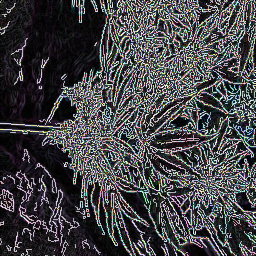

In [139]:
image_train[2]

array([[[ 0,  0,  0],
        [ 4,  4,  4],
        [ 4,  3,  5],
        ...,
        [ 0,  0,  1],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 4,  4,  4],
        [ 4,  2,  6],
        ...,
        [10,  8, 10],
        [10,  8, 10],
        [10,  8, 10]],

       [[ 0,  1,  1],
        [ 4,  4,  5],
        [ 4,  2,  8],
        ...,
        [ 6,  6,  4],
        [ 6,  6,  4],
        [ 6,  6,  4]],

       ...,

       [[10,  7,  9],
        [34, 37, 33],
        [63, 70, 60],
        ...,
        [29, 30, 30],
        [39, 40, 40],
        [32, 32, 32]],

       [[ 4,  5,  5],
        [46, 52, 45],
        [54, 66, 50],
        ...,
        [ 4,  4,  5],
        [20, 22, 22],
        [25, 26, 26]],

       [[ 0,  0,  0],
        [51, 57, 50],
        [53, 64, 48],
        ...,
        [10, 12, 12],
        [ 4,  5,  5],
        [ 0,  0,  0]]], dtype=uint8)
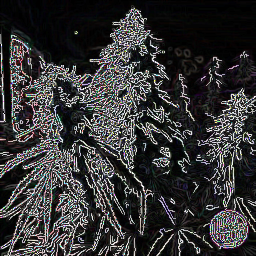

In [140]:
image_train[4]

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[27, 21, 24],
        [30, 24, 28],
        [22, 18, 20],
        ...,
        [16, 22, 22],
        [16, 24, 24],
        [17, 25, 25]],

       [[10,  5,  8],
        [ 9,  8,  8],
        [10, 14, 12],
        ...,
        [ 4, 10, 10],
        [ 4,  8,  9],
        [ 5,  8,  9]],

       [[ 0,  0,  0],
        [ 2,  1,  2],
        [ 6,  7,  6],
        ...,
        [ 0,  1,  2],
        [ 0,  1,  1],
        [ 0,  0,  0]]], dtype=uint8)
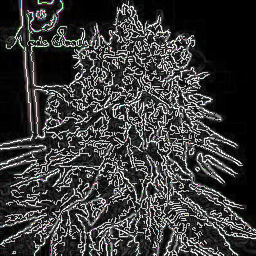

In [141]:
image_train[1610]

In [142]:
#junto las etiquetas para el entreamiento
etiquetas_train = np.concatenate((X_black['etiquetas'], X_gorila['etiquetas'], X_og['etiquetas'], X_slur['etiquetas']), axis=0)

In [143]:
etiquetas_train[2]

'Black Domina'

In [144]:
from sklearn.preprocessing import LabelEncoder
# Utilizamos LabelEncoder para pasar a numeros
# las etiquetas de entrenamiento
encoding = LabelEncoder()

In [145]:
encoded_etiquetas = encoding.fit_transform(etiquetas_train)

In [146]:
encoded_etiquetas[4]

0

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(image_train, encoded_etiquetas, test_size= .1, random_state=420)

In [ ]:
#Anteriormente probe agrandar el dataset con las mismas imagenes
#aplicandoles diferentes filtros, esta funcion se aplicaba
#para no cargar todo a la memoria si no por lotes de 2 imagenes.
"""
import tensorflow as tf

@tf.function
def train_step(X_batch, y_batch):
    with tf.GradientTape() as tape:
        predictions = model(X_batch, training=True)
        loss = tf.keras.losses.sparse_categorical_crossentropy(y_batch, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    model.optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

# Entrenamiento en lote
for epoch in range(3): # cantidad de epocas
    print("Epoch:", epoch+1)
    for i in range(0, len(X_train), 2):
        X_batch = X_train[i:i+2].astype('float32')  # Tomar solo 2 ejemplos como lote
        y_batch = y_train[i:i+2]
        loss = train_step(X_batch, y_batch)  # Llama a la función de entrenamiento
        print("Batch:", i+1, "Loss:", loss)

    # Evaluación en conjunto de validación al final de cada época
    val_loss, val_acc = model.evaluate(X_validation.astype('float32'), y_validation)
    print("Validation Loss:", val_loss, "Validation Accuracy:", val_acc)
"""

In [157]:
# Entrenamiento del modelo
model.fit(X_train, y_train, epochs=20, batch_size=64,
          validation_data=(X_validation, y_validation))

Epoch 1/20
27/27 [==============================] - 6s 127ms/step - loss: 48.3410 - accuracy: 0.3307 - val_loss: 1.3012 - val_accuracy: 0.4247
Epoch 2/20
27/27 [==============================] - 3s 114ms/step - loss: 1.2801 - accuracy: 0.4286 - val_loss: 1.2645 - val_accuracy: 0.4409
Epoch 3/20
27/27 [==============================] - 3s 129ms/step - loss: 1.1416 - accuracy: 0.5210 - val_loss: 1.2420 - val_accuracy: 0.4355
Epoch 4/20
27/27 [==============================] - 3s 127ms/step - loss: 0.9363 - accuracy: 0.6261 - val_loss: 1.2476 - val_accuracy: 0.5054
Epoch 5/20
27/27 [==============================] - 3s 118ms/step - loss: 0.7696 - accuracy: 0.6975 - val_loss: 1.1632 - val_accuracy: 0.5430
Epoch 6/20
27/27 [==============================] - 3s 117ms/step - loss: 0.5473 - accuracy: 0.7899 - val_loss: 1.2915 - val_accuracy: 0.5430
Epoch 7/20
27/27 [==============================] - 3s 119ms/step - loss: 0.4528 - accuracy: 0.8343 - val_loss: 1.3930 - val_accuracy: 0.5430
Epoch

In [158]:
#Etiquetas y imagenes de validacion.
X_tblack, X_tgorila = np.load('TBlackDomina_images.npz'), np.load('TGorilaGlue_images.npz')
X_tog, X_tslur = np.load('TOGKush_images.npz'), np.load('TSlurricane_images.npz')

In [159]:
etiqueta_test = np.concatenate((X_tblack['etiquetas'], X_tgorila['etiquetas'], X_tog['etiquetas'], X_tslur['etiquetas']), axis=0)
image_test = np.concatenate((X_tblack['imagenes'], X_tgorila['imagenes'], X_tog['imagenes'], X_tslur['imagenes']), axis=0)


In [160]:
#test_labels = encoding.transform(etiqueta_test.reshape(-1,1)).toarray()
test_labels = encoding.transform(etiqueta_test)

In [161]:
procesamiento_imagenes(image_test)

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  2,   2,   2],
        ...,
        [108,  24,  45],
        [ 98,  10,  32],
        [250, 146, 176]],

       [[  2,   2,   2],
        [  2,   2,   2],
        [  2,   2,   2],
        ...,
        [ 17,  14,   5],
        [ 58,  25,  32],
        [ 78,  36,  46]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  1,   1,   1],
        ...,
        [  1,   4,   2],
        [  3,   2,   1],
        [  0,   0,   0]]], dtype=uint8)
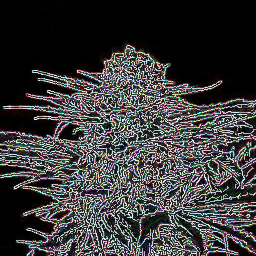

In [162]:
image_test[2]

In [165]:
# Evaluación del modelo
test_loss, test_acc = model.evaluate(image_test.astype('float32'), test_labels)

print('Test accuracy:', test_acc) #Con realce 0.287(5), # nitidez (3) 0.287 # sin filtro 0.287(3) # canny y solber (3 epocas) 0.51, (7 epocas) 0.56, relu (30) 0.63,

3/3 [==============================] - 0s 24ms/step - loss: 1.2253 - accuracy: 0.6750
Test accuracy: 0.675000011920929


In [169]:
#Modelo despues de entrenar.
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 30, 30, 128)      

In [170]:
#Guardar el modelo en formato keras.
model.save('modelo_relu_entrenado_0675.keras')

In [171]:
#Guardar el modelo en formato h5.
model.save('modelo_relu_entrenado_0675.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


In [173]:
model_json = model.to_json()
with open("model675.json", "w") as json_file:
    json_file.write(model_json)

# Guardar los pesos del modelo
model.save_weights("model675.weights.h5")
print("Modelo guardado correctamente.")

Modelo guardado correctamente.


In [ ]:
import pickle
# Guardar el objeto de codificación por si queremos
# Agregar más neuronas de salida.
with open('encoding.pkl', 'wb') as f:
    pickle.dump(encoding, f)